# Reflect stats

In [2]:
import pandas as pd

In [3]:
df = pd.read_json("results.json", lines=True)
df = df[["puzzle", "name", "device", "timestamp"]]
df

,puzzle,name,device,timestamp
0,2023-04-16,solved,e8791686-aa31-4da8-9096-61f37b5b45ba,2023-04-17 04:48:44.879
1,2023-04-16,solved,ff0cb9bb-9bc6-4087-9f2c-64083070706c,2023-04-16 19:31:42.507
2,2023-04-16,solved,5a373665-cfd5-4ab2-9fb0-a880b6a96355,2023-04-17 05:51:29.393
3,2023-04-16,solved,9543379a-7005-46ed-af93-0fed5cad2764,2023-04-16 10:50:51.894
4,2023-04-18,solved,7796331c-2702-41a2-90f6-47d35b8a483d,2023-04-19 01:18:47.538
...,...,...,...,...
1398,2023-04-29,firstMove,ff047259-772c-42b8-a472-a678b828b440,2023-04-30 15:10:54.884
1399,2023-04-29,firstMove,ff047259-772c-42b8-a472-a678b828b440,2023-04-29 12:14:39.027
1400,2023-04-30,firstMove,ff047259-772c-42b8-a472-a678b828b440,2023-04-30 15:14:45.059
1401,2023-05-06,firstMove,ff047259-772c-42b8-a472-a678b828b440,2023-05-06 17:07:28.220


Number of players per day

In [4]:
df_players = df.groupby("puzzle").agg("nunique").rename(columns={"device": "n_players"})
df_players = df_players[["n_players"]]
df_players

,n_players
puzzle,
2023-04-15,11
2023-04-16,23
2023-04-17,15
2023-04-18,11
2023-04-19,11
2023-04-20,11
2023-04-21,12
2023-04-22,17
2023-04-23,17


Number started per day

In [5]:
df_started = df[df["name"] == "firstMove"]
df_started = df_started.groupby("puzzle").agg("nunique").rename(columns={"device": "n_started"})
df_started = df_started[["n_started"]]
df_started

,n_started
puzzle,
2023-04-15,10
2023-04-16,18
2023-04-17,13
2023-04-18,11
2023-04-19,10
2023-04-20,11
2023-04-21,12
2023-04-22,16
2023-04-23,17


Number solved per day

In [6]:
df_solved = df[df["name"] == "solved"]
df_solved = df_solved.groupby("puzzle").agg("nunique").rename(columns={"device": "n_solved"})
df_solved = df_solved[["n_solved"]]
df_solved

,n_solved
puzzle,
2023-04-15,6
2023-04-16,14
2023-04-17,7
2023-04-18,11
2023-04-19,9
2023-04-20,11
2023-04-21,11
2023-04-22,12
2023-04-23,15


In [7]:
df_stats = pd.merge(df_players, df_started, on="puzzle")
df_stats = pd.merge(df_stats, df_solved, on="puzzle")
df_stats

,n_players,n_started,n_solved
puzzle,,,
2023-04-15,11,10,6
2023-04-16,23,18,14
2023-04-17,15,13,7
2023-04-18,11,11,11
2023-04-19,11,10,9
2023-04-20,11,11,11
2023-04-21,12,12,11
2023-04-22,17,16,12
2023-04-23,17,17,15


In [8]:
df_stats["success"] = 100 * df_stats["n_solved"] / df_stats["n_started"]
df_stats["failure"] = 100 - df_stats["success"]
df_stats

,n_players,n_started,n_solved,success,failure
puzzle,,,,,
2023-04-15,11,10,6,60.000000,40.000000
2023-04-16,23,18,14,77.777778,22.222222
2023-04-17,15,13,7,53.846154,46.153846
2023-04-18,11,11,11,100.000000,0.000000
2023-04-19,11,10,9,90.000000,10.000000
2023-04-20,11,11,11,100.000000,0.000000
2023-04-21,12,12,11,91.666667,8.333333
2023-04-22,17,16,12,75.000000,25.000000
2023-04-23,17,17,15,88.235294,11.764706


In [9]:
import math 
grouped = df.groupby(["puzzle", "device"])

def compute_solve_duration(group):
    """The time between the last 'first move' event before the first 'solved' event, and that 'solved' event."""
    
    events = group["name"].tolist()
    if "solved" not in events:
        return math.nan # wasn't solved
    
    # filter out preload events, and sort by timestamp
    group_playing = group[group["name"] != "preload"].sort_values(by=["timestamp"])
    
    last_first_move_time_before_solved = math.nan
    first_solve_time = math.nan
    for index, row in group_playing.iterrows():
        if row["name"] == "firstMove":
            last_first_move_time_before_solved = row["timestamp"]
        elif row["name"] == "solved":
            first_solve_time = row["timestamp"]
            break # ignore any more events (e.g. if solved again)
    return first_solve_time - last_first_move_time_before_solved

df_solve_durations = grouped.apply(compute_solve_duration)
df_solve_durations = df_solve_durations.reset_index(name="solve_duration")
df_solve_durations

,puzzle,device,solve_duration
0,2023-04-15,19e4e3c4-26e5-4fa5-a70d-2e05580d85f2,0 days 00:01:26.387000
1,2023-04-15,242ce71b-373e-424d-b6e5-cb7eb32455e7,NaT
2,2023-04-15,280ae5cd-f26f-4cca-af23-069d3f289b0b,0 days 01:04:52.549000
3,2023-04-15,532623db-b310-48bb-ad25-b5908efec959,0 days 00:03:16.170000
4,2023-04-15,6ffea007-dc05-48c7-8423-203379196209,0 days 00:04:26.418000
...,...,...,...
374,2023-05-06,cbd7e235-953c-4ee3-907d-dbc46e8e877e,NaT
375,2023-05-06,e7424c13-b3ed-484a-84ff-3e67d86675d6,NaT
376,2023-05-06,edc2b856-29ad-4aaf-bef3-cc4298596b2a,0 days 00:01:49.132000
377,2023-05-06,f7cc049d-03f0-4658-a38f-0c3106a03c04,0 days 00:02:08.484000


In [10]:
df_solve_durations = df_solve_durations[df_solve_durations["solve_duration"].notnull()]
df_solve_duration_stats = df_solve_durations.groupby("puzzle")["solve_duration"].median()
df_solve_duration_stats = df_solve_duration_stats.reset_index(name="median_solve_duration")
df_solve_duration_stats

,puzzle,median_solve_duration
0,2023-04-15,0 days 00:02:41.129500
1,2023-04-16,0 days 00:01:11.756500
2,2023-04-17,0 days 00:07:14.173000
3,2023-04-18,0 days 00:03:31.709000
4,2023-04-19,0 days 00:00:58.333000
5,2023-04-20,0 days 00:01:47.471000
6,2023-04-21,0 days 00:05:09.015000
7,2023-04-22,0 days 00:01:18.721500
8,2023-04-23,0 days 00:02:29.962000
9,2023-04-24,0 days 00:01:55.421500


In [11]:
df_stats = pd.merge(df_stats, df_solve_duration_stats, on="puzzle")
df_stats

,puzzle,n_players,n_started,n_solved,success,failure,median_solve_duration
0,2023-04-15,11,10,6,60.000000,40.000000,0 days 00:02:41.129500
1,2023-04-16,23,18,14,77.777778,22.222222,0 days 00:01:11.756500
2,2023-04-17,15,13,7,53.846154,46.153846,0 days 00:07:14.173000
3,2023-04-18,11,11,11,100.000000,0.000000,0 days 00:03:31.709000
4,2023-04-19,11,10,9,90.000000,10.000000,0 days 00:00:58.333000
5,2023-04-20,11,11,11,100.000000,0.000000,0 days 00:01:47.471000
6,2023-04-21,12,12,11,91.666667,8.333333,0 days 00:05:09.015000
7,2023-04-22,17,16,12,75.000000,25.000000,0 days 00:01:18.721500
8,2023-04-23,17,17,15,88.235294,11.764706,0 days 00:02:29.962000
9,2023-04-24,25,24,22,91.666667,8.333333,0 days 00:01:55.421500


## Graphs

<Axes: xlabel='puzzle', ylabel='median_solve_duration_s'>

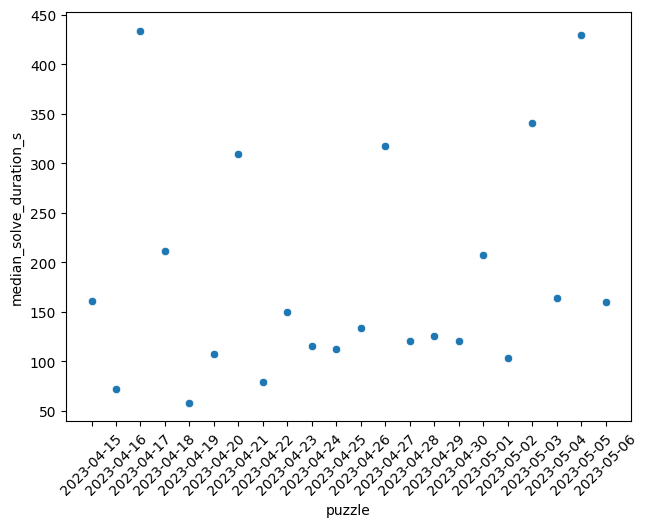

In [12]:
import matplotlib.pylab as plt
import seaborn as sns

plt.xticks(rotation=45)
plt.tight_layout()

df_stats["median_solve_duration_s"] = df_stats["median_solve_duration"].dt.total_seconds()
sns.scatterplot(data=df_stats, x="puzzle", y="median_solve_duration_s")

/var/folders/jz/_qsj6p5j2gg4s064yzhrbtcw0000gn/T/ipykernel_20672/1280235708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solve_durations["solve_duration_s"] = df_solve_durations["solve_duration"].dt.total_seconds()


<Axes: xlabel='puzzle', ylabel='solve_duration_s'>

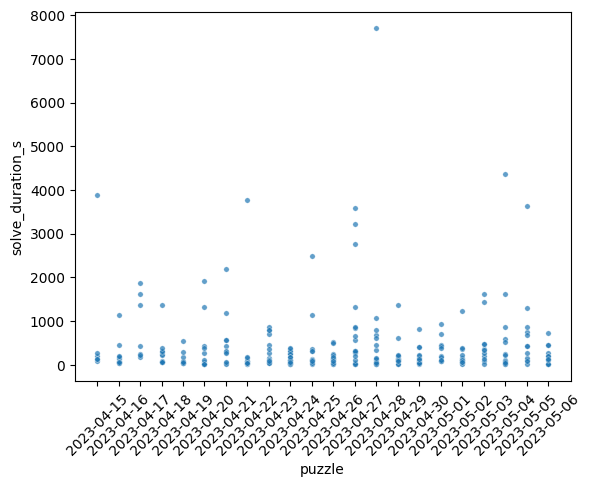

In [13]:
df_solve_durations["solve_duration_s"] = df_solve_durations["solve_duration"].dt.total_seconds()
plt.xticks(rotation=45)
sns.scatterplot(data=df_solve_durations, x="puzzle", y="solve_duration_s", s=15, alpha=0.7)

<Axes: xlabel='puzzle', ylabel='failure'>

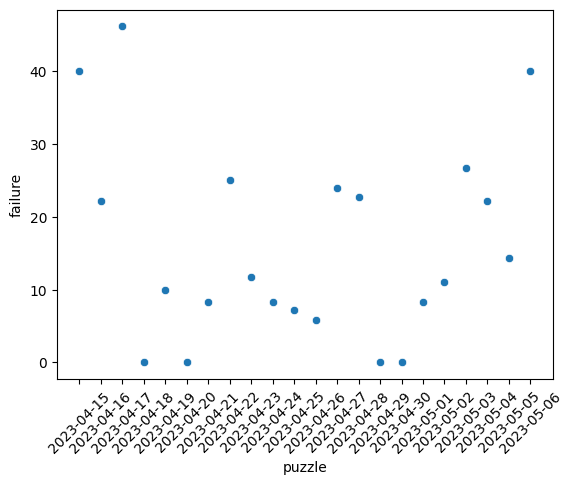

In [14]:
plt.xticks(rotation=45)
sns.scatterplot(data=df_stats, x="puzzle", y="failure")

## Feature analysis

Let's load features and see how they correlate with difficulty (as measured by `mean_solve_duration`)

In [15]:
features = pd.read_csv("features.csv")
features[['puzzle']] = features.filename.str.extract(r'puzzle-(.+).txt', expand=True)
features

,filename,difficulty,num_blocks,num_mirror_balls,num_beams,mean_blocks_per_beam,max_blocks_per_beam,mean_beams_per_block,max_beams_per_block,mean_beam_distance,max_beam_distance,num_zero_reflection_blocks,puzzle
0,puzzle-2023-03-31.txt,4,5,1,6,1.333333,3,1.600000,2,3.833333,10,0,2023-03-31
1,puzzle-2023-04-01.txt,2,4,1,5,1.200000,2,1.500000,2,4.000000,8,0,2023-04-01
2,puzzle-2023-04-02.txt,3,6,0,4,1.750000,2,1.166667,2,6.250000,11,0,2023-04-02
3,puzzle-2023-04-03.txt,2,3,0,4,1.000000,3,1.333333,2,5.500000,8,0,2023-04-03
4,puzzle-2023-04-04.txt,2,4,0,3,1.666667,2,1.250000,2,5.000000,8,0,2023-04-04
5,puzzle-2023-04-05.txt,3,4,0,4,1.500000,4,1.500000,2,6.000000,10,0,2023-04-05
6,puzzle-2023-04-06.txt,3,5,0,4,1.750000,2,1.400000,2,6.250000,8,0,2023-04-06
7,puzzle-2023-04-07.txt,2,5,0,5,1.400000,2,1.400000,2,5.200000,7,0,2023-04-07
8,puzzle-2023-04-08.txt,3,5,0,4,1.250000,2,1.250000,2,6.000000,7,1,2023-04-08
9,puzzle-2023-04-09.txt,3,3,1,4,1.500000,2,2.000000,2,3.750000,5,0,2023-04-09


In [16]:
df_all = pd.merge(df_stats, features, on="puzzle")
df_all

,puzzle,n_players,n_started,n_solved,success,failure,median_solve_duration,median_solve_duration_s,filename,difficulty,num_blocks,num_mirror_balls,num_beams,mean_blocks_per_beam,max_blocks_per_beam,mean_beams_per_block,max_beams_per_block,mean_beam_distance,max_beam_distance,num_zero_reflection_blocks
0,2023-04-15,11,10,6,60.000000,40.000000,0 days 00:02:41.129500,161.1295,puzzle-2023-04-15.txt,4,5,1,6,1.166667,3,1.400000,2,4.666667,10,0
1,2023-04-16,23,18,14,77.777778,22.222222,0 days 00:01:11.756500,71.7565,puzzle-2023-04-16.txt,4,6,1,6,1.666667,3,1.666667,2,4.833333,9,0
2,2023-04-17,15,13,7,53.846154,46.153846,0 days 00:07:14.173000,434.1730,puzzle-2023-04-17.txt,4,7,0,5,2.200000,6,1.571429,2,6.000000,8,0
3,2023-04-18,11,11,11,100.000000,0.000000,0 days 00:03:31.709000,211.7090,puzzle-2023-04-18.txt,4,6,1,7,1.571429,3,1.833333,4,4.000000,7,0
4,2023-04-19,11,10,9,90.000000,10.000000,0 days 00:00:58.333000,58.3330,puzzle-2023-04-19.txt,4,6,1,6,1.666667,3,1.666667,3,4.666667,8,0
5,2023-04-20,11,11,11,100.000000,0.000000,0 days 00:01:47.471000,107.4710,puzzle-2023-04-20.txt,4,4,0,4,1.500000,4,1.500000,2,6.500000,12,0
6,2023-04-21,12,12,11,91.666667,8.333333,0 days 00:05:09.015000,309.0150,puzzle-2023-04-21.txt,3,5,1,6,1.666667,4,2.000000,3,4.500000,7,0
7,2023-04-22,17,16,12,75.000000,25.000000,0 days 00:01:18.721500,78.7215,puzzle-2023-04-22.txt,4,6,0,6,1.666667,4,1.666667,2,5.666667,11,0
8,2023-04-23,17,17,15,88.235294,11.764706,0 days 00:02:29.962000,149.9620,puzzle-2023-04-23.txt,4,5,1,7,1.428571,3,2.000000,4,3.857143,7,0
9,2023-04-24,25,24,22,91.666667,8.333333,0 days 00:01:55.421500,115.4215,puzzle-2023-04-24.txt,4,5,1,5,1.600000,3,1.600000,3,4.200000,8,0


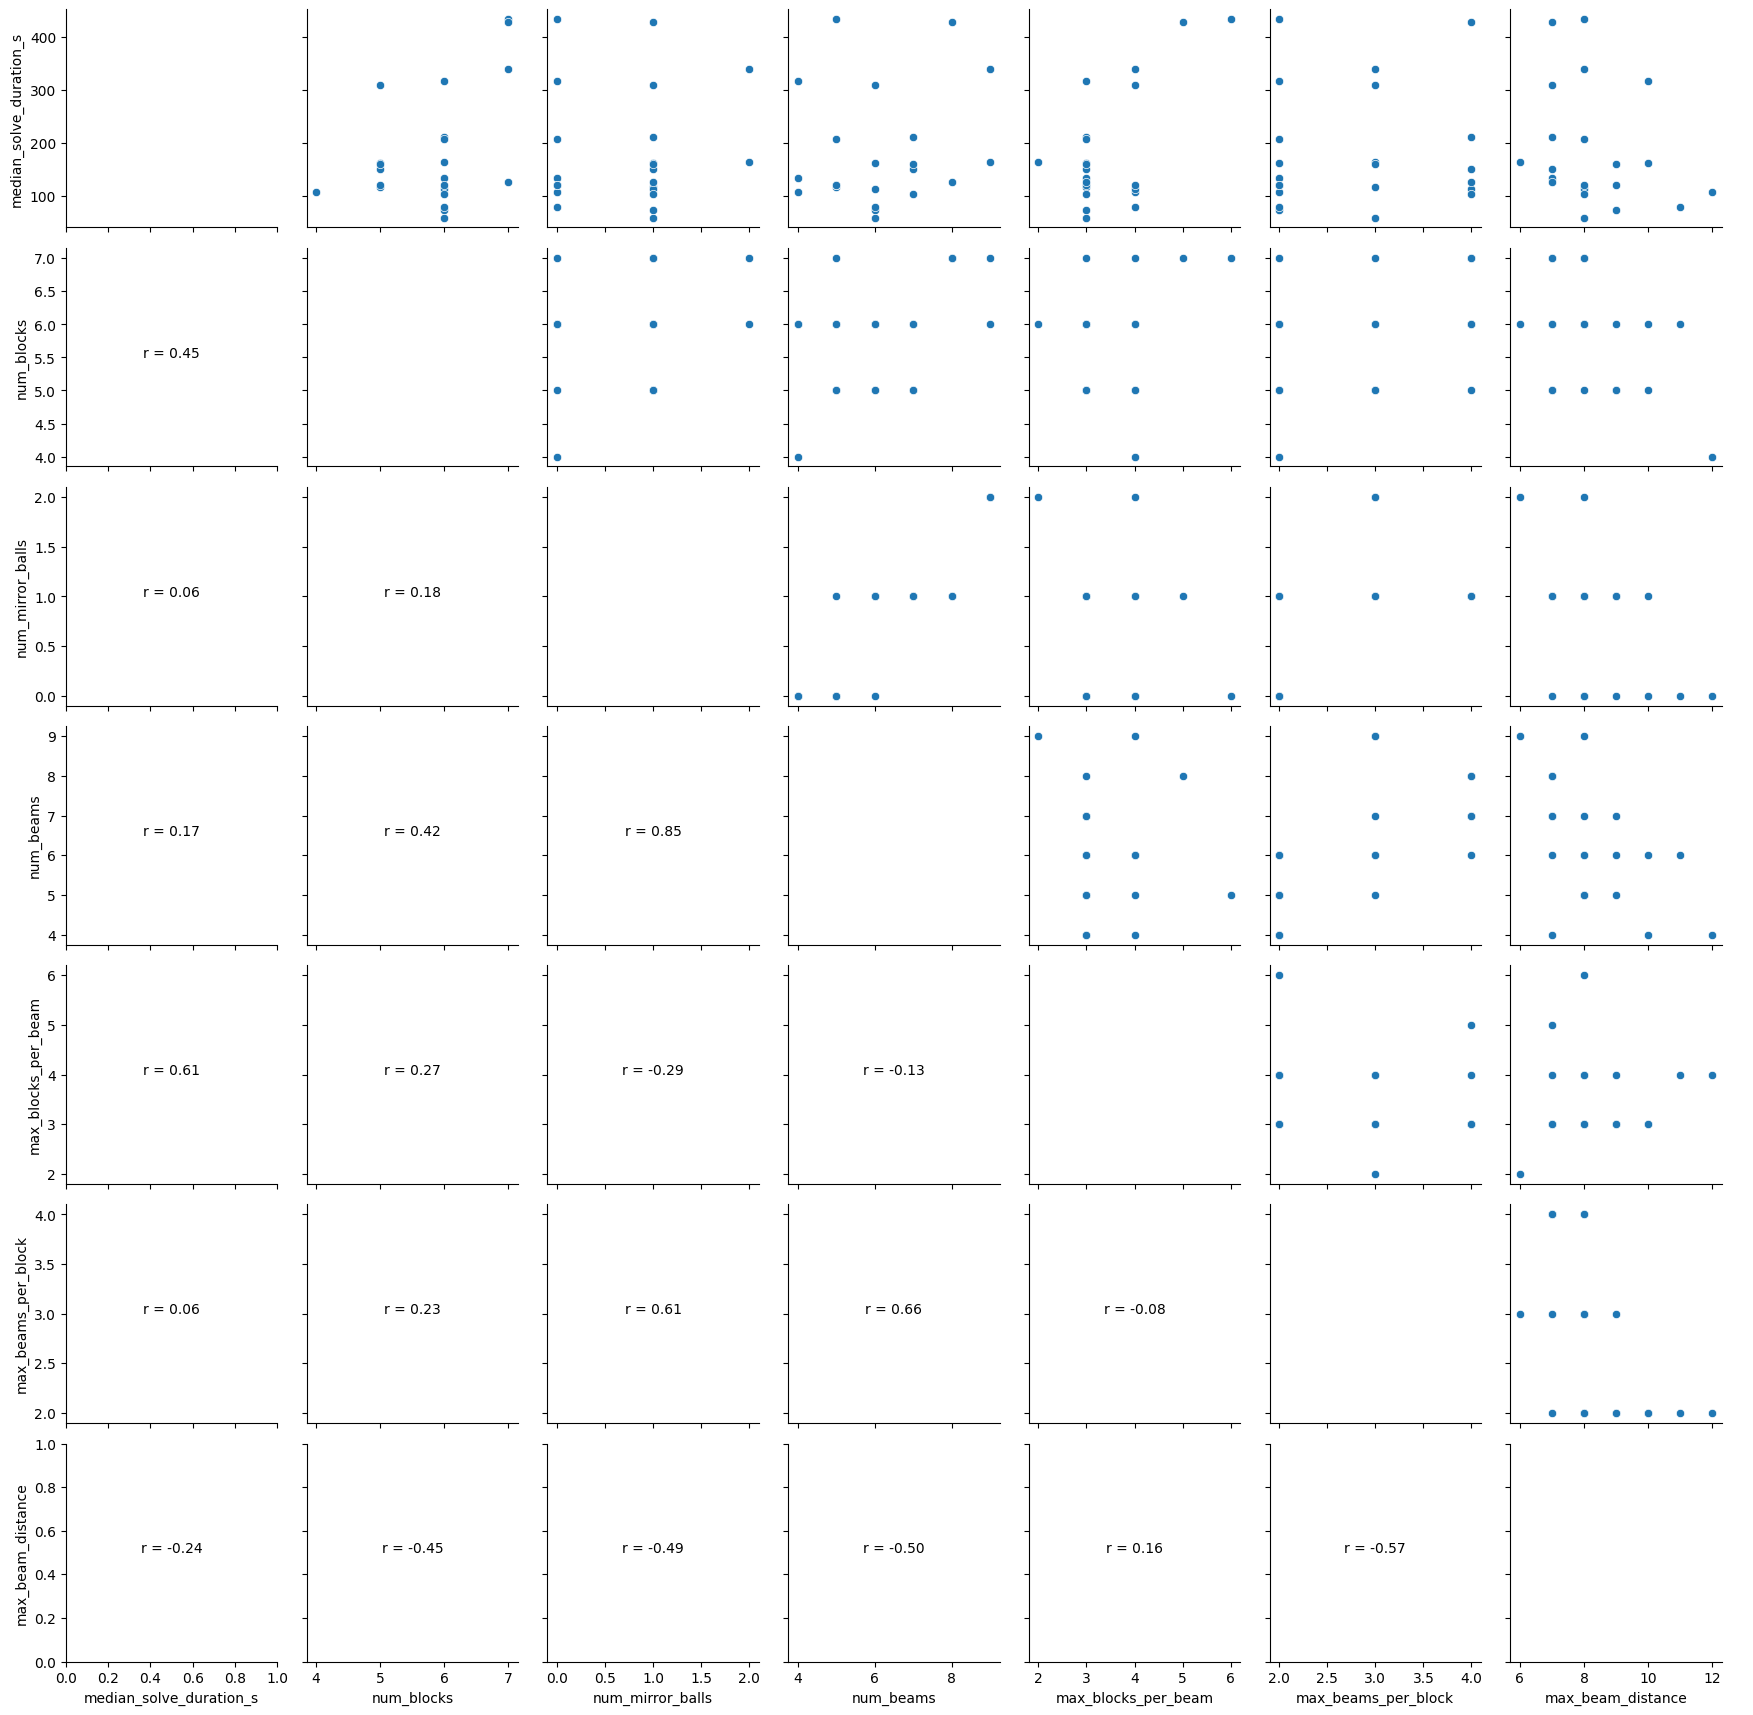

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
df_correlation = df_all[["median_solve_duration_s", "num_blocks", "num_mirror_balls", "num_beams", "max_blocks_per_beam", "max_beams_per_block", "max_beam_distance"]]

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')

g = sns.PairGrid(df_correlation)
g.map_upper(sns.scatterplot)
g.map_lower(reg_coef)
g.add_legend()

# Baseline model

Let's produce a really simple linear model to predict solve duration. This is meant to be a baseline, and will hopefully help in setting puzzles of appropriate difficultly.

In [18]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_all, test_size=3, random_state=0)
df_test

,puzzle,n_players,n_started,n_solved,success,failure,median_solve_duration,median_solve_duration_s,filename,difficulty,num_blocks,num_mirror_balls,num_beams,mean_blocks_per_beam,max_blocks_per_beam,mean_beams_per_block,max_beams_per_block,mean_beam_distance,max_beam_distance,num_zero_reflection_blocks
20,2023-05-05,15,14,12,85.714286,14.285714,0 days 00:07:09.777000,429.7770,puzzle-2023-05-05.txt,4,7,1,8,1.625,5,1.857143,4,3.750000,7,0
10,2023-04-25,17,14,13,92.857143,7.142857,0 days 00:01:52.855000,112.8550,puzzle-2023-04-25.txt,4,6,1,6,2.000,4,2.000000,4,4.166667,8,0
14,2023-04-29,17,16,16,100.000000,0.000000,0 days 00:02:05.234500,125.2345,puzzle-2023-04-29.txt,4,7,1,8,1.625,3,1.857143,4,3.625000,7,0


In [19]:
X_train = df_train[["max_blocks_per_beam"]]
y_train = df_train[["median_solve_duration_s"]]

X_test = df_test[["max_blocks_per_beam"]]
y_test = df_test[["median_solve_duration_s"]]

In [20]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

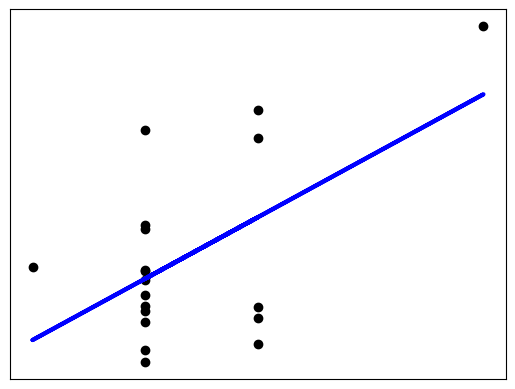

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, regr.predict(X_train), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [22]:
y_pred = regr.predict(X_test)
y_pred

array([[289.29933898],
       [220.57471186],
       [151.85008475]])

In [23]:
y_test

,median_solve_duration_s
20,429.7770
10,112.8550
14,125.2345


In [24]:
regr.score(X_test, y_test)

0.502750472528779

In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

91.60431920903955

In [26]:
from joblib import dump
#dump(regr, "model.joblib") 

## Random forest

In [44]:
df_train.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success', 'failure',
       'median_solve_duration', 'median_solve_duration_s', 'filename',
       'difficulty', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'mean_beams_per_block',
       'max_beams_per_block', 'mean_beam_distance', 'max_beam_distance',
       'num_zero_reflection_blocks'],
      dtype='object')

In [53]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'mean_beams_per_block',
       'max_beams_per_block', 'mean_beam_distance', 'max_beam_distance',
       'num_zero_reflection_blocks']

In [45]:
X_train = df_train[feature_names]
y_train = df_train[["median_solve_duration_s"]]

X_test = df_test[feature_names]
y_test = df_test[["median_solve_duration_s"]]

In [104]:
# from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, max_features="sqrt", max_depth=100)
rf.fit(X_train, y_train)

/var/folders/jz/_qsj6p5j2gg4s064yzhrbtcw0000gn/T/ipykernel_20672/1289687413.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=100, max_features='sqrt', n_estimators=1000)

In [105]:
y_pred = rf.predict(X_test)
y_pred

array([264.1916575, 198.2453305, 242.035237 ])

In [106]:
y_test

,median_solve_duration_s
20,429.7770
10,112.8550
14,125.2345


In [107]:
rf.score(X_test, y_test)

0.2497254884894501

In [108]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

122.59213666666727

In [98]:
importances = rf.feature_importances_
import numpy as np
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

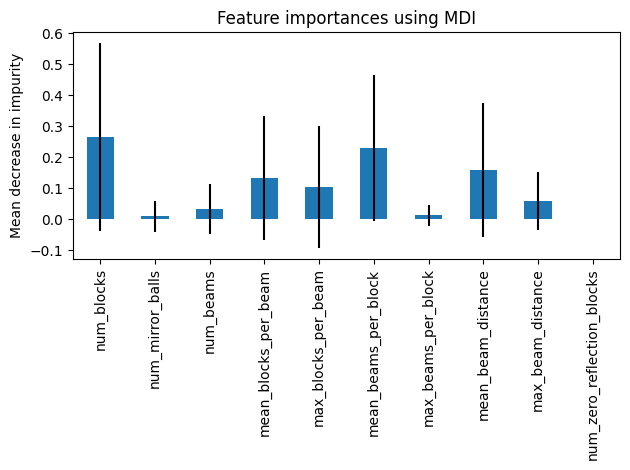

In [99]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()